# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1054.449829,366830
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1068.492188,925740
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1052.254150,1754242
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1013.461548,2423784
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1001.489868,2636332


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1283.500000,1283.500000,1270.500000,1272.775024,366830
1,1275.500000,1295.474976,1275.300049,1289.724976,925740
2,1290.500000,1299.949951,1262.324951,1270.125000,1754242
3,1264.550049,1264.550049,1220.000000,1223.300049,2423784
4,1235.000000,1239.574951,1203.724976,1208.849976,2636332


Visualizing Closing Price

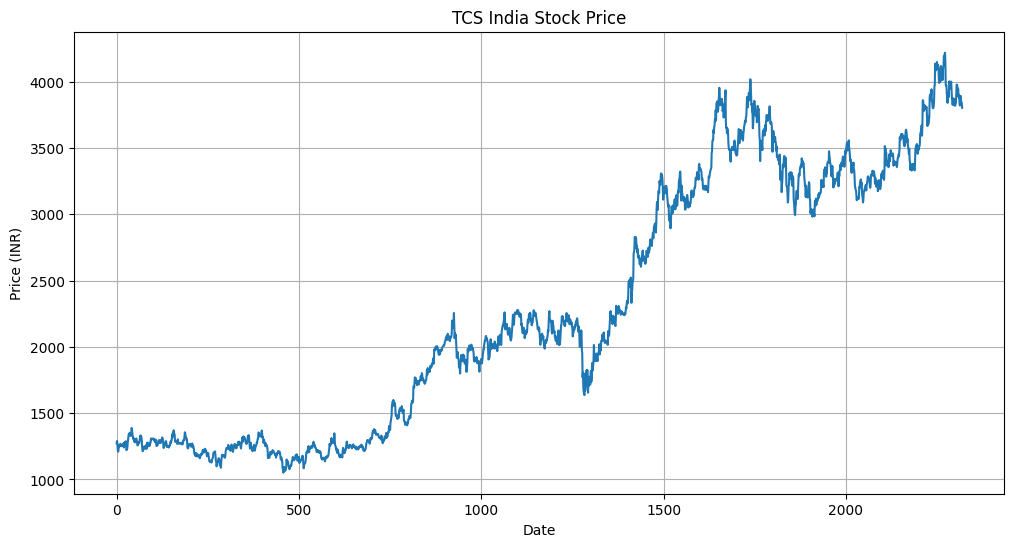

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume
0,1283.500000,1283.500000,1270.500000,1272.775024,366830
1,1275.500000,1295.474976,1275.300049,1289.724976,925740
2,1290.500000,1299.949951,1262.324951,1270.125000,1754242
3,1264.550049,1264.550049,1220.000000,1223.300049,2423784
4,1235.000000,1239.574951,1203.724976,1208.849976,2636332
...,...,...,...,...,...
2315,3840.949951,3905.000000,3825.500000,3893.449951,2095742
2316,3878.250000,3883.800049,3844.300049,3849.500000,1309452
2317,3855.000000,3908.350098,3841.350098,3847.050049,1841538
2318,3858.000000,3870.000000,3830.000000,3839.899902,1801993


# Plotting moving averages of 100 day

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2315    3936.551008
2316    3936.806008
2317    3937.321008
2318    3937.608008
2319    3937.645508
Name: Close, Length: 2320, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

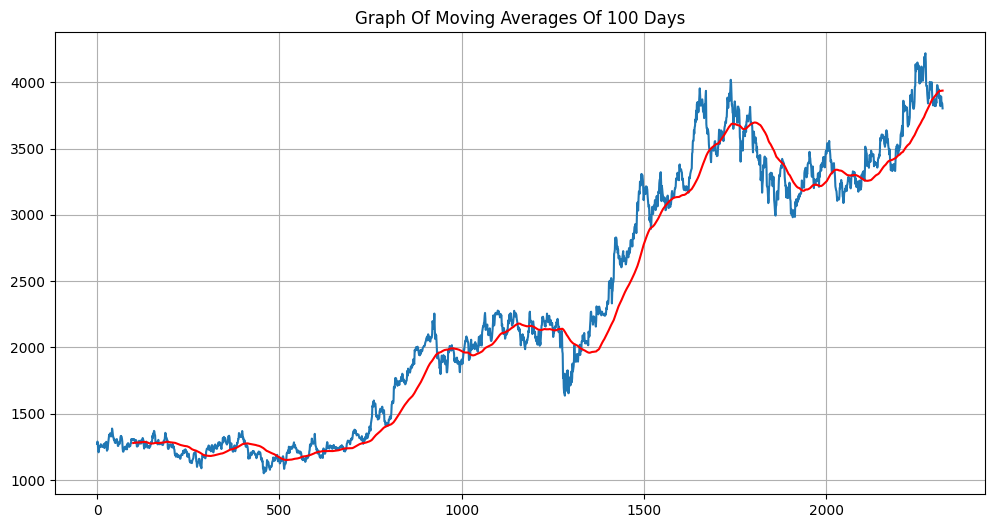

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2315    3716.103754
2316    3718.366754
2317    3720.825005
2318    3722.917255
2319    3724.675254
Name: Close, Length: 2320, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

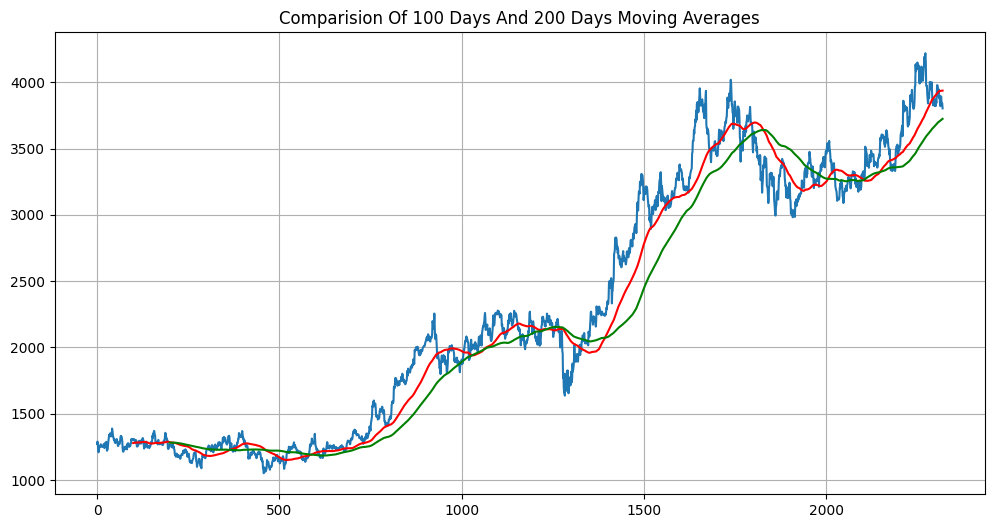

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(2320, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1624, 7)
(696, 7)


In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1054.449829,366830
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1068.492188,925740
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1052.254150,1754242
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1013.461548,2423784
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1001.489868,2636332


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1624,2021-08-03,3229.000000,3290.000000,3218.949951,3284.899902,3093.240723,3804735
1625,2021-08-04,3300.000000,3305.199951,3261.199951,3273.949951,3082.929932,2929598
1626,2021-08-05,3275.000000,3315.000000,3262.500000,3283.949951,3092.346680,2534521
1627,2021-08-06,3272.550049,3324.000000,3265.000000,3309.800049,3116.688477,2292362
1628,2021-08-09,3323.899902,3337.000000,3310.000000,3322.699951,3128.835693,1510489


# Using MinMax scaler for normalization of the dataset

---



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.09535563],
       [0.10262958],
       [0.09421839],
       ...,
       [0.92060853],
       [0.90844228],
       [0.93073624]])

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [19]:
x_train.shape

(1524, 100, 1)

# ML Model (LSTM)

---



In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)           │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 100, 50)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)           │     26,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)           │     45,120 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)           │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)               │     96,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 120)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │        121 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - loss: 0.0878 - mean_absolute_error: 0.2117
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - loss: 0.0089 - mean_absolute_error: 0.0661
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 0.0072 - mean_absolute_error: 0.0564
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - loss: 0.0070 - mean_absolute_error: 0.0543
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0068 - mean_absolute_error: 0.0562
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 0.0071 - mean_absolute_error: 0.0559
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 0.0064 - mean_absolute_error: 0.0539
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 0.0061 - mean_absolute_error: 0.0524
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 0.0056 - mean_absolute_error: 0.0513
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0050 - mean_absolute_error: 0.0489


In [24]:
model.save('keras_model.h5')

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [25]:
test_close.shape

(696, 1)

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [30]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [31]:
final_df.head()

,0
0,3008.050049
1,3006.949951
2,3050.949951
3,3070.949951
4,3057.949951


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0210152 ],
       [0.02012601],
       [0.05569019],
       [0.07185573],
       [0.06134813],
       [0.06797596],
       [0.10345943],
       [0.10580335],
       [0.04401063],
       [0.05508398],
       [0.11930154],
       [0.12976888],
       [0.11239093],
       [0.06692536],
       [0.06850146],
       [0.14266085],
       [0.15826063],
       [0.1478742 ],
       [0.20760577],
       [0.22845935],
       [0.23387477],
       [0.27101525],
       [0.27497572],
       [0.21378921],
       [0.09860977],
       [0.19148069],
       [0.17224366],
       [0.14528775],
       [0.13134498],
       [0.11053185],
       [0.10301484],
       [0.09598287],
       [0.12120106],
       [0.11481576],
       [0.10766243],
       [0.04332352],
       [0.04441477],
       [0.0547203 ],
       [0.09186058],
       [0.10459094],
       [0.12192843],
       [0.1321128 ],
       [0.11360334],
       [0.08531365],
       [0.05613478],
       [0.07088583],
       [0.08628355],
       [0.080

In [33]:
input_data.shape

(796, 1)

# Testing the model

---



In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(696, 100, 1)
(696,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [36]:
# Making predictions

y_pred = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


In [37]:
y_pred.shape

(696, 1)

In [38]:
y_test

array([0.24478651, 0.23593591, 0.24401868, 0.26491272, 0.27533941,
       0.28439207, 0.29271736, 0.29881989, 0.38906391, 0.396783  ,
       0.46152604, 0.46758812, 0.46673939, 0.52970407, 0.51014381,
       0.54716293, 0.55754937, 0.59658898, 0.58135308, 0.65017777,
       0.59238598, 0.69083413, 0.69511804, 0.70316035, 0.67398148,
       0.64023592, 0.6541787 , 0.69778539, 0.73056085, 0.78604917,
       0.74462499, 0.68364054, 0.68012446, 0.71201094, 0.71136428,
       0.71710312, 0.71876013, 0.69099575, 0.64427731, 0.65458284,
       0.64136763, 0.6047122 , 0.63954901, 0.68804561, 0.6699401 ,
       0.73621879, 0.77077262, 0.56866317, 0.54219211, 0.54409144,
       0.50872933, 0.53758477, 0.52707717, 0.50662793, 0.44491592,
       0.41771748, 0.41294853, 0.40458298, 0.41036208, 0.35531836,
       0.33600062, 0.39957151, 0.40587611, 0.41238278, 0.42563844,
       0.42086968, 0.42325406, 0.40595702, 0.40910922, 0.43970257,
       0.46172811, 0.46423365, 0.4363481 , 0.39900576, 0.38502

In [39]:
y_pred

array([[0.2411483 ],
       [0.23761758],
       [0.23462115],
       [0.2323147 ],
       [0.23081563],
       [0.23023114],
       [0.23063135],
       [0.23203073],
       [0.23437625],
       [0.23775917],
       [0.24229278],
       [0.24816747],
       [0.25552663],
       [0.26440638],
       [0.27485502],
       [0.28680447],
       [0.30016425],
       [0.31480074],
       [0.33060113],
       [0.34737742],
       [0.36502004],
       [0.38328874],
       [0.4020792 ],
       [0.42131522],
       [0.4409114 ],
       [0.4606824 ],
       [0.48031425],
       [0.49949282],
       [0.5180347 ],
       [0.535892  ],
       [0.5531719 ],
       [0.5699268 ],
       [0.58601934],
       [0.6012437 ],
       [0.6154743 ],
       [0.6286392 ],
       [0.64072114],
       [0.6517403 ],
       [0.6616741 ],
       [0.67039555],
       [0.6778106 ],
       [0.68385077],
       [0.68841976],
       [0.6915521 ],
       [0.693474  ],
       [0.69443303],
       [0.694813  ],
       [0.695

In [40]:
scaler.scale_

array([0.00080828])

In [41]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

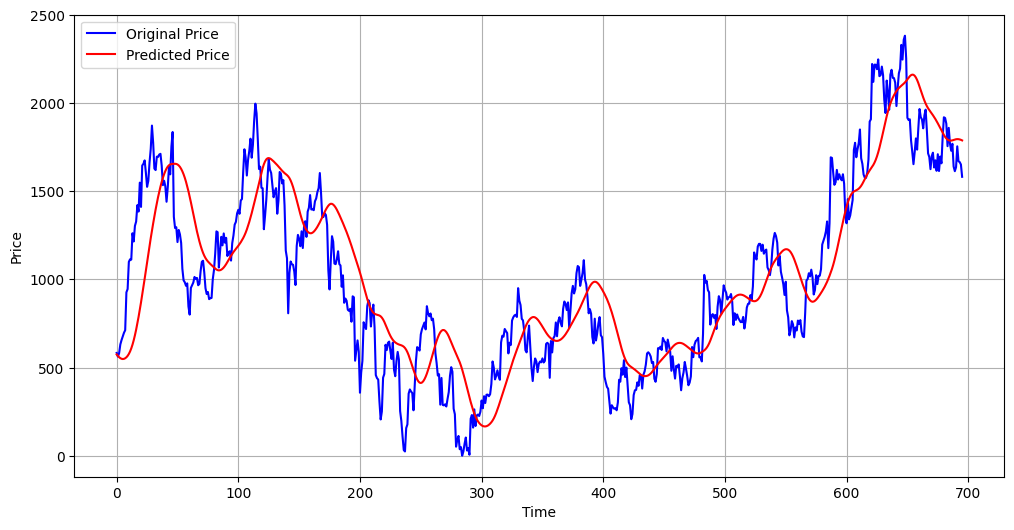

In [42]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 22.00%


Calculation of R2 score

In [44]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.730369577938708


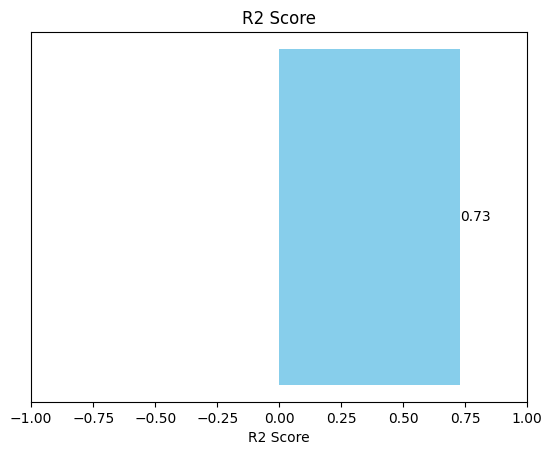

In [45]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

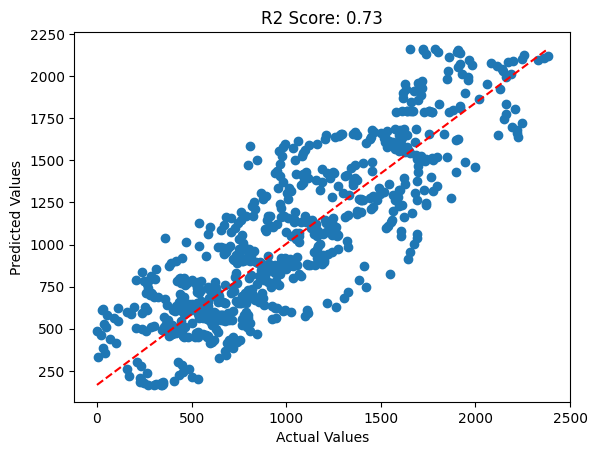

In [46]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()